# Exploratory Data Analysis in Python

## What we'll cover

* [Single Files](#Single-Files)
  * Several formats
* [Databases](#Databases)
  * [Types](#Types)
  * [CLIs](#CLI-for-databases)
  * [GUIs](#GUIs-for-databases)
  * [ORMs](#ORM)

<hr>

## Single Files

<hr>

<hr>

## Databases

<hr>

### Types



### CLI for databases



### GUIs for databases




### SQL Databases

In [ ]:
# create and write data from a sqlite3 database
# Python3 comes with sqlite and can be a power tool for initial data exploration

import sqlite3
import csv

# create the database 
connection = sqlite3.connect('data/census_2019_fl.db')
# create a cursor to interact with the database
cursor = connection.cursor()
# use the cursor to execute SQL commands on the database. here we're creating a table.

In [ ]:
cursor.execute('CREATE TABLE flcensus2019 (id, geoid, label, totpop, medage, malevoter, femalevoter);')
# with the CSV we intend to use to append out table, iterate through the CSV rows
with open('data/census_2019_fl.csv', 'r') as data:
    fl_data = csv.DictReader(data)
    to_database = [(i['id'],
                    i['geoid'],
                    i['label'],
                    i['totpop'],
                    i['medage'],
                    i['malevoter'],
                    i['femalevoter'])
                   for i in fl_data
                  ]

In [ ]:
# take the output of the above iterations and place the CSV row data into the database table
cursor.executemany('INSERT INTO flcensus2019 (id, geoid, label, totpop, medage, malevoter, femalevoter) VALUES (?, ?, ?, ?, ?, ?, ?);', to_database)

In [ ]:
# commit your changes to the database and tables
connection.commit()
# close your connection to the database
connection.close()

In [ ]:
# read data from sqlite3 database
import pandas as pd

connection = sqlite3.connect('data/census_2019_fl.db')
# use pandas to read a table from the database connection to create a dataframe
census_2019_fl_sql = pd.read_sql_query("SELECT * FROM flcensus2019", connection)
# close the database connection once you're done creating your pandas dataframe
connection.close()

In [ ]:
# test your dataframe
census_2019_fl_sql.head(2)

### NoSQL Databases

#### MongoDB

Honestly the easiest way to import `CSV`, `JSON`, and other flat files is to use the `mongoimport` CLI tool.

At the terminal, type a `mongoimport` command like the one below to import your data:

`mongoimport -d census2019 -c flcensus2019 --type csv --file data/census_2019_fl.csv --headerline`

`-d` is the new database mongo will create to store your collections<br>
`-c` is the new collection for your flat file import<br>
`--type` denotes the type of file (e.g., CSV, JSON)<br>
`--file` is the relative path to your flat file<br>
`--headerline` denotes that the flat file has a headerline (specific to CSV)<br>

In [ ]:
# Connect to and access a mongo database

from pymongo import MongoClient
# create a MongoDB connection called a client
client = MongoClient()
# create a database named census2010
database = client.census2019
# create a mongo collection named kycensus2010
flcensus2019 = database.flcensus2019
# create a pandas dataframe for a list of the kycensus2010 record search outputs
census_2019_fl_mongo = pd.DataFrame(list(flcensus2019.find()))

In [ ]:
# check your dataframe
census_2019_fl_mongo.head(2)

# notice how Mongo has assigned each record a unique _id

#### Apache Cassandra

When compared to MongoDB, Apache Cassandra is a NoSQL database that is preferrable for a number of reasons including its ability to scalability, decentralization, and performance.

There is a [python client](https://github.com/datastax/python-driver) for Cassandra that you can use in a similar fashion to PyMongo above.

### Graph Databases

Given this is an intro course, I'll save graph databases until a future social network analysis in Python class. Just know that they exist and have some interesting 
properties as compared to SQL and NoSQL databases.

There are links below for `Apache AGE`, `Neo4j`, and `Grakn`. There is also `simple-graph` for SQLite databases.

### ORM

An Object Relational Mapper (ORM) is a layer in between your user interface and the database driver that:

* Associates a Pythonic model to each database table
* Allows you to migrate your schema to several SQL databases

What this means is that once you have your tables and database built once, you can move it easily without having to re-write SQL scripts for the new database.

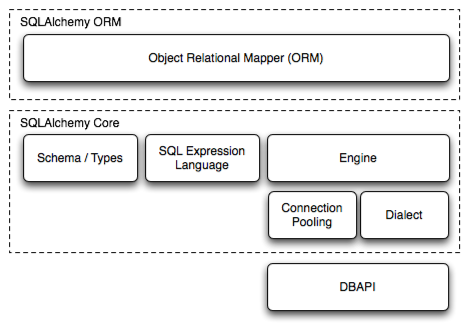

What follows is a rebuild of our SQL model above using SQLAlchemy.

#### Query with SQLAlchemy

In [ ]:
# use sqlalchemy to manipulate sql databases
# if you plan to move your sqlite3 database to another sql database, use this approach
import pandas as pd
import sqlalchemy as sqla
# create a sqlachemy database connection (or engine)
# this is use to connect to an existing database
census_2019_fl_database = sqla.create_engine('sqlite:///data/census_2019_fl.db')
# read a table from the database usng the above engine
census_2019_fl_sql_2 = pd.read_sql('SELECT * FROM flcensus2019', census_2019_fl_database)
# check your dataframe
census_2019_fl_sql_2.head(2)

#### Build with SQLAlchemy

In [ ]:
# Now, let's redo our database build using a SQLAlchemy model.
# import the connection and table creation elements
from sqlalchemy import create_engine, Column, Integer, Float, String
# the base class will hold the table objects and classes
from sqlalchemy.ext.declarative import declarative_base
# sessionmaker will allow us to interaction with the database
from sqlalchemy.orm import sessionmaker

In [ ]:
# create the engine for the selected database in memory
engine = create_engine('sqlite:///:memory:', echo=True)
# the metadata object will hold the table
Base = declarative_base()
# define the table object with the name and schema
class Census(Base):
    __tablename__ = 'census'
    
    id = Column('id', String, primary_key=True)
    geoid = Column('geoid', Integer)
    label = Column('label', String)
    totpop = Column('totpop', Integer)
    medage = Column('medage', Float)
    malevoter = Column('malevoter', Integer)
    femalevoter = Column('femalevoter', Integer)


In [ ]:
# create the defined tables
Base.metadata.create_all(engine)

In [ ]:
# use sessionmake to interact with the database
Session = sessionmaker(bind=engine)
session = Session()

In [ ]:
# add data from CSV into the census table


In [ ]:
# test the database
census = session.query(Census).all()

In [ ]:
# connect to database with pandas and create dataframe


In [ ]:
# test your dataframe
census_2019_fl_sqla.head(2)

<hr>

### Resources

<hr>

* [SQLAlchemy](https://www.sqlalchemy.org/)
* [PostgreSQL](https://www.postgresql.org/)
  * [PostGIS](https://postgis.net/)
  * [Apache AGE](https://age.apache.org/)
* [MongoDB](https://www.mongodb.com/)
  * [pymongo](https://api.mongodb.com/python/current/)
* [Cassandra](https://cassandra.apache.org/)
* [Neo4j](https://neo4j.com/)
  * [py2neo](https://py2neo.org/2021.0/)
* [Grakn](https://grakn.ai/)
* [Datastax DSE Graph](https://www.datastax.com/products/datastax-graph)